In [1]:
# Basics
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Data Transform
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Train Model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm

## Data Load

In [2]:
train = pd.read_csv('archive/train.csv')
test = pd.read_csv('archive/test.csv')

In [3]:
print('Dimensoes do dataset de treino: ',train.shape)
print('Dimensoes do dataset de teste: ',test.shape)

Dimensoes do dataset de treino:  (20279, 17)
Dimensoes do dataset de teste:  (13519, 16)


In [3]:
data = train.copy()

In [5]:
train.head()

,gift_id,gift_type,gift_category,gift_cluster,instock_date,stock_update_date,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,uk_date1,uk_date2,is_discounted,volumes,price
0,GF_11156,61,534,3942,2014-02-21 05:07:06.000,2016-11-09 15:49:51.000,3377,5221,504,1912,10,554,2014-02-24 08:07:06.000,2014-02-24 07:07:06.000,0,NaN,175.54
1,GF_11157,61,534,3942,2014-02-21 06:07:06.000,2016-11-11 13:49:51.000,3377,5221,504,1912,10,554,2014-02-22 07:07:06.000,2014-02-24 06:07:06.000,1,NaN,95.80
2,GF_15689,584,262,0,2014-02-21 09:30:21.000,2016-03-24 14:46:18.000,5290,1579,3203,1912,9,1578,2016-01-26 00:04:45.000,2016-03-18 02:00:00.000,1,NaN,107.35
3,GF_11155,61,534,3942,2014-02-22 05:07:06.000,2016-11-10 16:49:51.000,3377,5221,504,1912,10,554,2016-11-07 13:49:51.000,2016-11-06 04:00:00.000,0,NaN,172.90
4,GF_11158,61,534,3942,2014-02-22 07:07:06.000,2016-11-10 13:49:51.000,3377,5221,504,1912,9,554,2016-11-07 15:49:51.000,2016-11-06 01:00:00.000,1,NaN,77.72


In [6]:
test.head()

,gift_id,gift_type,gift_category,gift_cluster,instock_date,stock_update_date,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,uk_date1,uk_date2,is_discounted,volumes
0,GF_2372,842,663,24,2016-11-12 13:49:12.000,2016-11-16 10:49:12.000,203,1334,4358,1912,10,1899,2016-11-16 12:49:12.000,2016-11-13 04:00:00.000,0,NaN
1,GF_13040,407,534,754,2016-11-12 13:49:22.000,2016-11-17 14:49:22.000,4785,5940,2582,1912,10,1488,2016-11-12 14:49:22.000,2016-11-03 01:00:00.000,0,NaN
2,GF_5754,631,433,6012,2016-11-12 13:49:23.000,2016-11-16 13:49:23.000,1812,5027,3427,1912,10,1913,2016-11-15 11:49:23.000,2016-11-01 05:00:00.000,1,NaN
3,GF_1417,992,433,6358,2016-11-12 13:49:24.000,2016-11-16 11:49:24.000,2002,6883,5537,1912,10,1734,2016-11-14 12:49:24.000,2016-11-04 04:00:00.000,0,NaN
4,GF_23204,43,534,6123,2016-11-12 13:49:40.000,2016-11-18 11:49:40.000,1512,6883,610,1912,9,150,2016-11-14 10:49:40.000,2016-11-02 01:00:00.000,1,NaN


## Data Transform

### Missing values analytcs

In [4]:
data.isna().sum()

gift_id                  0
gift_type                0
gift_category            0
gift_cluster             0
instock_date             0
stock_update_date        0
lsg_1                    0
lsg_2                    0
lsg_3                    0
lsg_4                    0
lsg_5                    0
lsg_6                    0
uk_date1                 0
uk_date2                 0
is_discounted            0
volumes              12956
price                    0
dtype: int64

In [8]:
data['volumes'].notna().sum() 


7323

In [10]:
data['volumes'].describe()

count    7323.000000
mean       15.515363
std         7.579669
min         5.000000
25%         9.000000
50%        13.000000
75%        24.000000
max        29.000000
Name: volumes, dtype: float64

In [5]:
data = data.dropna(axis=1)

In [6]:
data.isna().sum()

gift_id              0
gift_type            0
gift_category        0
gift_cluster         0
instock_date         0
stock_update_date    0
lsg_1                0
lsg_2                0
lsg_3                0
lsg_4                0
lsg_5                0
lsg_6                0
uk_date1             0
uk_date2             0
is_discounted        0
price                0
dtype: int64

In [61]:
data.dtypes

gift_id               object
gift_type              int64
gift_category          int64
gift_cluster           int64
instock_date          object
stock_update_date     object
lsg_1                  int64
lsg_2                  int64
lsg_3                  int64
lsg_4                  int64
lsg_5                  int64
lsg_6                  int64
uk_date1              object
uk_date2              object
is_discounted          int64
price                float64
dtype: object

## Data analysis

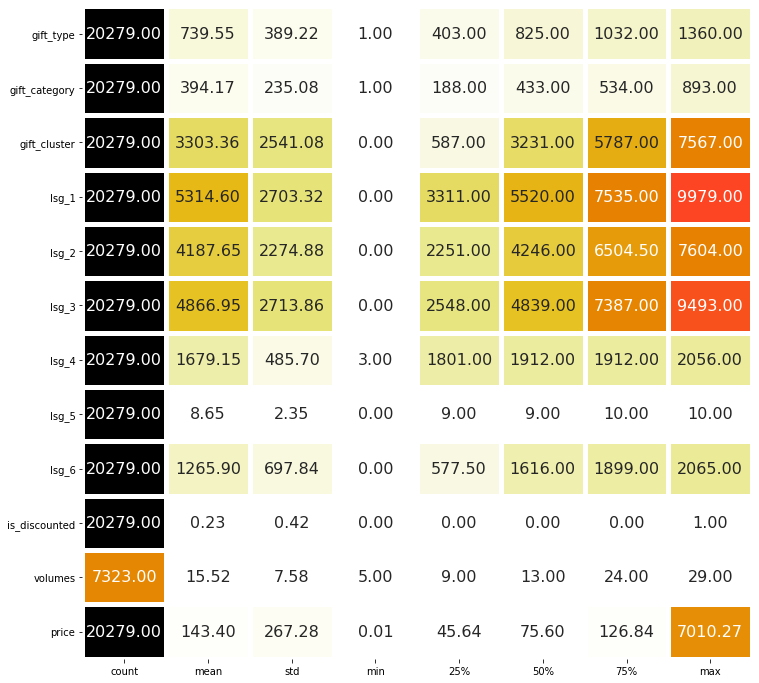

In [20]:
desc = train.describe().T
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(desc, annot=True, cmap='CMRmap_r', fmt='0.2f',
            ax=ax, linewidths=5, cbar=False,
            annot_kws={'size': 16})

plt.show()

<Figure size 864x864 with 0 Axes>

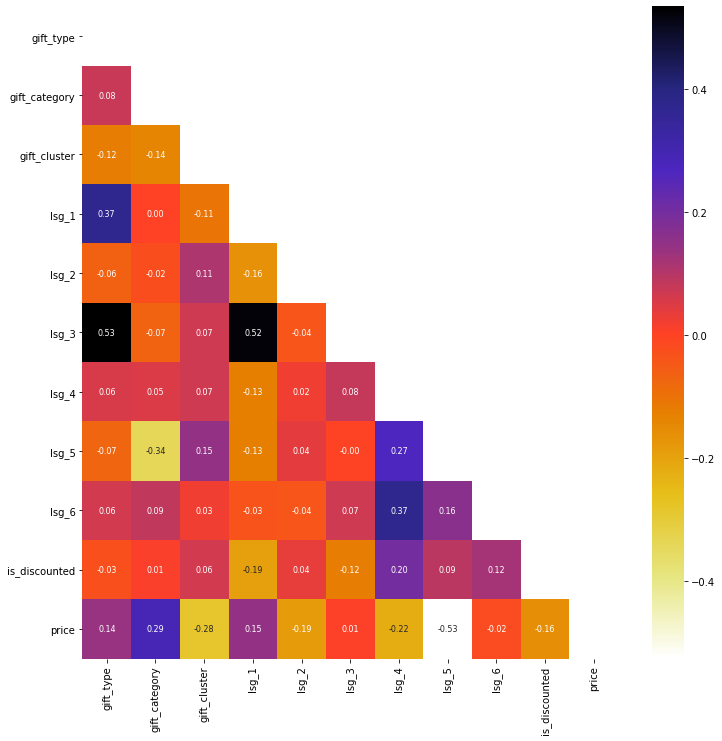

In [23]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 12))
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr, annot=True, cmap='CMRmap_r', mask=mask, fmt='0.2f', ax=ax, annot_kws={'size': 8})
plt.show()

## Data Visualization

<AxesSubplot:xlabel='price', ylabel='Density'>

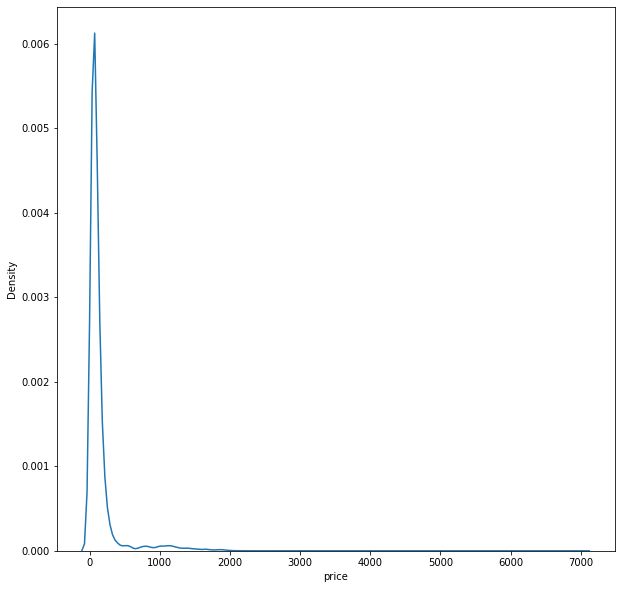

In [37]:
plt.figure(figsize=(10, 10))
sns.kdeplot(x='price', data=data)

In [181]:
df = data[0:2000]

In [183]:
df['instock_date'] = pd.to_datetime(df['instock_date'])

<ipython-input-183-e08608c3cbff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['instock_date'] = pd.to_datetime(df['instock_date'])


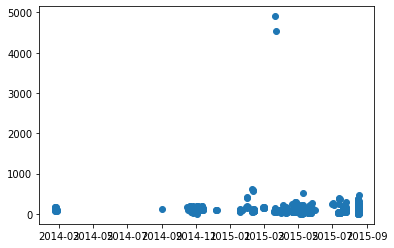

In [184]:
plt.scatter(x='instock_date', y='price', data=df)

In [24]:
data.columns

Index(['gift_id', 'gift_type', 'gift_category', 'gift_cluster', 'instock_date',
       'stock_update_date', 'lsg_1', 'lsg_2', 'lsg_3', 'lsg_4', 'lsg_5',
       'lsg_6', 'uk_date1', 'uk_date2', 'is_discounted', 'price'],
      dtype='object')

### Splitting of Test and Train Data

In [8]:
data.columns

Index(['gift_id', 'gift_type', 'gift_category', 'gift_cluster', 'instock_date',
       'stock_update_date', 'lsg_1', 'lsg_2', 'lsg_3', 'lsg_4', 'lsg_5',
       'lsg_6', 'uk_date1', 'uk_date2', 'is_discounted', 'price'],
      dtype='object')

In [143]:
X = data.drop(['gift_id' ,'price', 'instock_date', 'stock_update_date', 'uk_date1', 'uk_date2'], axis=1)
y = data['price'].values

In [145]:
feature_list = list(X.columns)

In [80]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [133]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (15209, 10)
Training Labels Shape: (15209,)
Testing Features Shape: (5070, 10)
Testing Labels Shape: (5070,)


# Creating and Training Model

## 1) Linear Regression

In [83]:
lr = LinearRegression().fit(X_train, y_train)

In [84]:
lr.score(X_test, y_test)

0.37848179967696227

## 2) RandomForest Regressor

In [165]:
rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)

In [166]:
rf.score(X_test, y_test)

0.8100743820510244

In [90]:
y_pred = rf.predict(X_test)

In [102]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean squared error:', mse)
print('Mean absolute error:', mae)
print('Root mean squared error:', rmse)
print('R2 Score:', r2)

Mean squared error: 15318.424129368821
Mean absolute error: 36.69613336650772
Root mean squared error: 123.7676214903107
R2 Score: 0.8054456646676136


In [171]:
importances = list(rf.feature_importances_)

In [175]:
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: lsg_5                Importance: 0.38
Variable: gift_cluster         Importance: 0.19
Variable: lsg_2                Importance: 0.12
Variable: gift_category        Importance: 0.11
Variable: lsg_3                Importance: 0.08
Variable: lsg_1                Importance: 0.05
Variable: gift_type            Importance: 0.03
Variable: lsg_6                Importance: 0.02
Variable: is_discounted        Importance: 0.02
Variable: lsg_4                Importance: 0.01


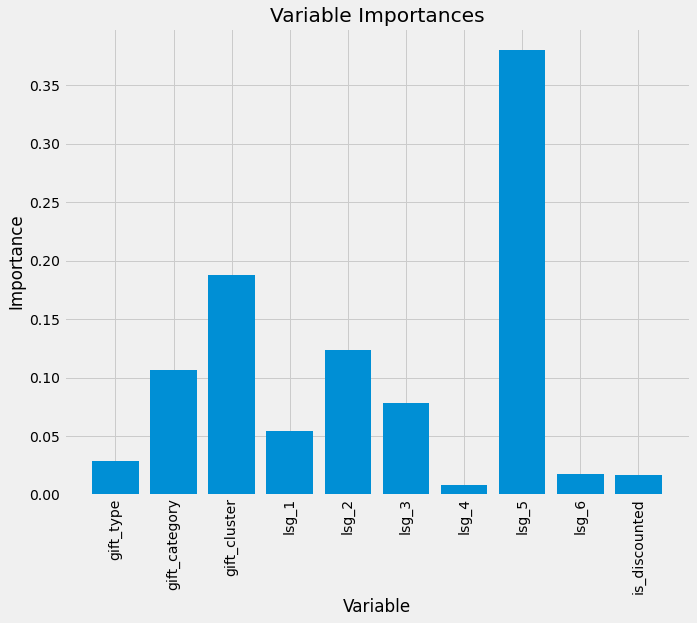

In [181]:
x_values = list(range(len(importances)))
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.bar(x_values, importances)
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')
plt.show()

In [127]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2).fit()
print(est.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     1229.
Date:                Sat, 05 Jun 2021   Prob (F-statistic):               0.00
Time:                        10:36:14   Log-Likelihood:            -1.3729e+05
No. Observations:               20279   AIC:                         2.746e+05
Df Residuals:                   20268   BIC:                         2.747e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        143.4044      1.481     96.813      0.0